# Mumbai House Price Prediction - Supervised Machine Learning-Regression Problem

## Data Preprocessing

# The main goal of this project is to Predict the price of the houses in Mumbai using their features.

# Import Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
from scipy import stats
import re

# Load dataset 

In [2]:
# Load the dataset

df=pd.read_csv('house_scrape.csv')
df.head(5)

C:\Users\piyus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BHK,location,price(L),rate_persqft,area_insqft,construction_status,type_of_sale,Sale_type,Bathroom
0,1,Panvel,18.49,7034,263,Under Construction,Possession by Mar 2024New,new,NaN
1,1,Dombivali,40.00,11869,337,Under Construction,Possession by Nov 2023New,new,NaN
2,2,Koper Khairane,149.00,22513,664,Under Construction,Possession by Feb 2023New,new,NaN
3,2,Dombivali,49.00,7802,628,Under Construction,Possession by Sep 2021New,new,NaN
4,1,Jogeshwari West,96.00,14222,675,Under Construction,Possession by Nov 20232 BathroomsNew,new,2 bathrooms


In [3]:
df = df.drop(['type_of_sale'], axis = 1) 

In [4]:
df.shape

(131120, 8)

In [5]:
duplicate = df[df.duplicated()] 
duplicate

,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Sale_type,Bathroom
34,1,Dombivali,40.0,11869,337,Under Construction,new,NaN
62,1,Vangani,15.8,4000,395,Under Construction,new,NaN
111,2,Koper Khairane,153.0,21739,704,Under Construction,new,NaN
112,2,Dombivali,49.0,7802,628,Under Construction,new,NaN
114,1,Dombivali,39.0,7991,488,Under Construction,new,NaN
...,...,...,...,...,...,...,...,...
131107,2,Kanjurmarg,171.0,25279,677,Ready to move,new,2 bathrooms
131109,2,Kanjurmarg,152.0,22723,669,Under Construction,new,NaN
131110,1,Kanjurmarg,104.0,22560,465,Under Construction,new,2 bathrooms
131111,2,Kanjurmarg,132.0,22533,590,Under Construction,new,2 bathrooms


In [6]:
# Drops the duplicate entires in the dataset.

df=df.drop_duplicates()

In [7]:
# As number of rows would vary we need to reset index.

df=df.reset_index()
df.head()

,index,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Sale_type,Bathroom
0,0,1,Panvel,18.49,7034,263,Under Construction,new,NaN
1,1,1,Dombivali,40.00,11869,337,Under Construction,new,NaN
2,2,2,Koper Khairane,149.00,22513,664,Under Construction,new,NaN
3,3,2,Dombivali,49.00,7802,628,Under Construction,new,NaN
4,4,1,Jogeshwari West,96.00,14222,675,Under Construction,new,2 bathrooms


In [8]:
# Dropping unnecessary columns in dataset.

df=df.drop(labels='index',axis=1)
df.head()


,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Sale_type,Bathroom
0,1,Panvel,18.49,7034,263,Under Construction,new,NaN
1,1,Dombivali,40.00,11869,337,Under Construction,new,NaN
2,2,Koper Khairane,149.00,22513,664,Under Construction,new,NaN
3,2,Dombivali,49.00,7802,628,Under Construction,new,NaN
4,1,Jogeshwari West,96.00,14222,675,Under Construction,new,2 bathrooms


# Exploratory Data Analysis

In [9]:
df.shape

(84040, 8)

In [10]:
df.info()

#we have 3 numeric variables and 5 categorical variables
#we have column price in lakhs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84040 entries, 0 to 84039
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BHK                  84040 non-null  int64  
 1   location             84040 non-null  object 
 2   price(L)             84040 non-null  float64
 3   rate_persqft         84040 non-null  object 
 4   area_insqft          84040 non-null  int64  
 5   construction_status  84040 non-null  object 
 6   Sale_type            51033 non-null  object 
 7   Bathroom             75088 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.1+ MB


In [11]:
df.describe()

#observe 75% and max value it shows huge diff

,BHK,price(L),area_insqft
count,84040.000000,84040.000000,84040.000000
mean,1.841171,150.937717,952.594871
std,0.877062,253.161649,613.250161
min,1.000000,1.400000,30.000000
25%,1.000000,44.100000,600.000000
50%,2.000000,85.000000,800.000000
75%,2.000000,166.000000,1102.000000
max,9.000000,9900.000000,15000.000000


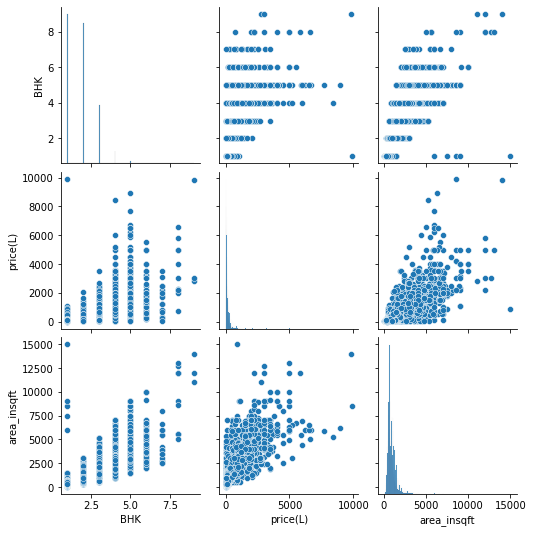

In [12]:
sns.pairplot(df)
plt.show()

# area_insqft and price(L) have slightly linear correlation with some outliers

In [13]:
# value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

In [14]:
value_count(df)

1    34598
2    32489
3    13527
4     2777
5      476
6      141
7       18
8       11
9        3
Name: BHK, dtype: int64
--------------------------------
Thane West           6749
Mira Road East       5843
Kharghar             2857
Kandivali East       2470
Ulwe                 2396
                     ... 
Sector 29 Vashi         1
Near Khopat             1
Vishveshwar Nagar       1
Grant Road Area         1
Penkarpada Road         1
Name: location, Length: 1244, dtype: int64
--------------------------------
85.00     994
75.00     943
110.00    927
90.00     913
95.00     875
         ... 
90.67       1
7.49        1
674.00      1
32.83       1
31.80       1
Name: price(L), Length: 6161, dtype: int64
--------------------------------
10000     231
10000     222
20000     210
5000      206
25000     185
         ... 
22260       1
16011       1
27080       1
27081       1
22848       1
Name: rate_persqft, Length: 30314, dtype: int64
--------------------------------
650     2114
600 

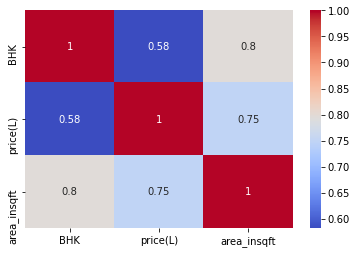

In [15]:
# correlation heatmap

sns.heatmap(df.corr(),cmap="coolwarm", annot=True)
plt.show()



# Preare Data for Machine Learning Model

# Data Cleaning

In [16]:
df.isnull().sum() # find the homuch missing data available

BHK                        0
location                   0
price(L)                   0
rate_persqft               0
area_insqft                0
construction_status        0
Sale_type              33007
Bathroom                8952
dtype: int64

In [17]:
df.isnull().mean()*100 # % of measing value

BHK                     0.000000
location                0.000000
price(L)                0.000000
rate_persqft            0.000000
area_insqft             0.000000
construction_status     0.000000
Sale_type              39.275345
Bathroom               10.652070
dtype: float64

<AxesSubplot:>

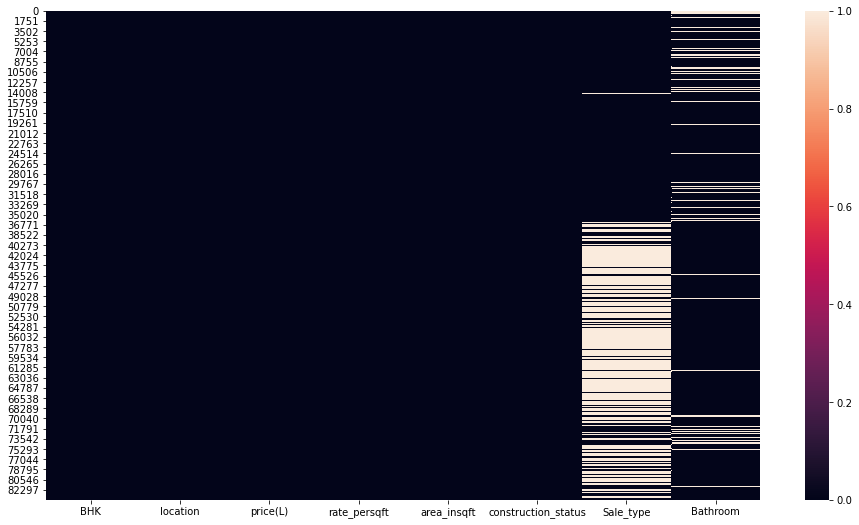

In [18]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# Handling the null values of sale_type

In [19]:
df.loc[df['construction_status'] == 'Under Construction', 'Sale_type'] = 'new'
df

#so here we can replace the null values for sale_type with help of construnction_status column we can replace 'new' in sale_type where status is 'Under Construntion'.

,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Sale_type,Bathroom
0,1,Panvel,18.49,7034,263,Under Construction,new,NaN
1,1,Dombivali,40.00,11869,337,Under Construction,new,NaN
2,2,Koper Khairane,149.00,22513,664,Under Construction,new,NaN
3,2,Dombivali,49.00,7802,628,Under Construction,new,NaN
4,1,Jogeshwari West,96.00,14222,675,Under Construction,new,2 bathrooms
...,...,...,...,...,...,...,...,...
84035,1,Ghatkopar East,45.00,15000,300,Ready to move,resale,1 bathrooms
84036,1,Ghatkopar,80.00,14545,550,Ready to move,resale,1 bathrooms
84037,2,Ghatkopar,170.00,25185,675,Ready to move,resale,2 bathrooms
84038,2,Ghatkopar,17.00,1789,950,Ready to move,resale,2 bathrooms


In [20]:
df1 = df['Sale_type']
df1

0           new
1           new
2           new
3           new
4           new
          ...  
84035    resale
84036    resale
84037    resale
84038    resale
84039    resale
Name: Sale_type, Length: 84040, dtype: object

In [21]:
df = df.drop(['Sale_type'],axis = 1)
df.head()

#we can drop the Sale_type as we will concatenate it in df. 

,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Bathroom
0,1,Panvel,18.49,7034,263,Under Construction,NaN
1,1,Dombivali,40.00,11869,337,Under Construction,NaN
2,2,Koper Khairane,149.00,22513,664,Under Construction,NaN
3,2,Dombivali,49.00,7802,628,Under Construction,NaN
4,1,Jogeshwari West,96.00,14222,675,Under Construction,2 bathrooms


In [22]:
df1 = df1.fillna(method='ffill')
df1.isnull().sum()

#to handle rest of the null values in Sale_type we used ffill() method 

0

In [23]:
df = pd.concat([df, df1], axis=1)
df.head()

,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Bathroom,Sale_type
0,1,Panvel,18.49,7034,263,Under Construction,NaN,new
1,1,Dombivali,40.00,11869,337,Under Construction,NaN,new
2,2,Koper Khairane,149.00,22513,664,Under Construction,NaN,new
3,2,Dombivali,49.00,7802,628,Under Construction,NaN,new
4,1,Jogeshwari West,96.00,14222,675,Under Construction,2 bathrooms,new


# Handling the null values of Bathroom 

In [24]:
#we need to extract the numeric value from string first

df["Bathroom"] = df.assign(Bathroom = lambda x: x['Bathroom'].str.extract('(\d+)'))

In [25]:
#lets convert the bathroom from object type to numeric

df["Bathroom"] = pd.to_numeric(df["Bathroom"])

In [26]:
df2 = df['Bathroom']
df2

0        1
1        1
2        2
3        2
4        1
        ..
84035    1
84036    1
84037    2
84038    2
84039    1
Name: Bathroom, Length: 84040, dtype: int64

In [27]:
df = df.drop(['Bathroom'],axis = 1)
df.head()

#we can drop the Bathroom as we will concatenate it in df. 

,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Sale_type
0,1,Panvel,18.49,7034,263,Under Construction,new
1,1,Dombivali,40.00,11869,337,Under Construction,new
2,2,Koper Khairane,149.00,22513,664,Under Construction,new
3,2,Dombivali,49.00,7802,628,Under Construction,new
4,1,Jogeshwari West,96.00,14222,675,Under Construction,new


In [28]:
df2 = df2.fillna(method='bfill')
df2.isnull().sum()

#to handle rest of the null values in Sale_type we used ffill() method 

0

In [29]:
df = pd.concat([df, df2], axis=1)
df.head()

,BHK,location,price(L),rate_persqft,area_insqft,construction_status,Sale_type,Bathroom
0,1,Panvel,18.49,7034,263,Under Construction,new,1
1,1,Dombivali,40.00,11869,337,Under Construction,new,1
2,2,Koper Khairane,149.00,22513,664,Under Construction,new,2
3,2,Dombivali,49.00,7802,628,Under Construction,new,2
4,1,Jogeshwari West,96.00,14222,675,Under Construction,new,1


In [30]:
df.isnull().sum() #check for the null values

#so our data has no null values now we can proceed further now with other data preprocessing

BHK                    0
location               0
price(L)               0
rate_persqft           0
area_insqft            0
construction_status    0
Sale_type              0
Bathroom               0
dtype: int64

In [31]:
#lets convert the rate_persqft from object type to numeric
# got error cannot convert str "price" at position 604 so replacing price with rate/sqft value.

df["rate_persqft"] = df["rate_persqft"].replace("Price", 8761)

df["rate_persqft"] = pd.to_numeric(df["rate_persqft"])

In [32]:
#now we can check the description of the data again

df.describe() 

,BHK,price(L),rate_persqft,area_insqft,Bathroom
count,84040.000000,84040.000000,84040.000000,84040.000000,84040.000000
mean,1.841171,150.937717,13501.078534,952.594871,1.841171
std,0.877062,253.161649,10397.049106,613.250161,0.877062
min,1.000000,1.400000,222.000000,30.000000,1.000000
25%,1.000000,44.100000,6388.000000,600.000000,1.000000
50%,2.000000,85.000000,10354.500000,800.000000,2.000000
75%,2.000000,166.000000,17825.250000,1102.000000,2.000000
max,9.000000,9900.000000,197255.000000,15000.000000,9.000000


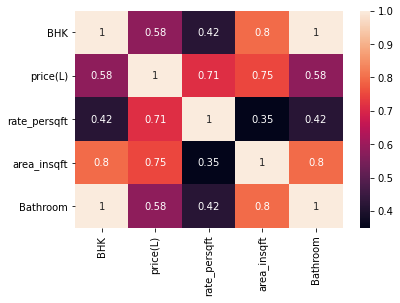

In [33]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Finding outliers and removing them

In [34]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* BHK *******


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


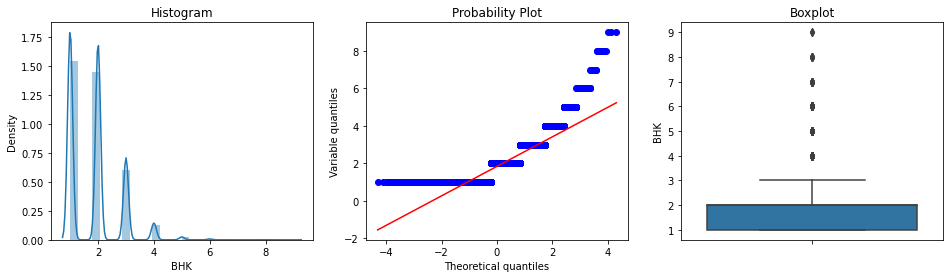

******* price(L) *******


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


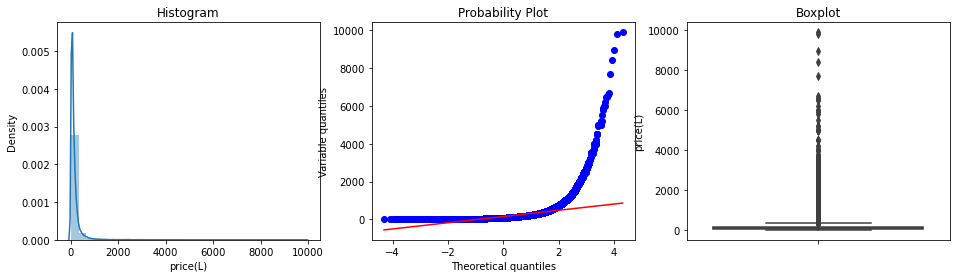

******* rate_persqft *******


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


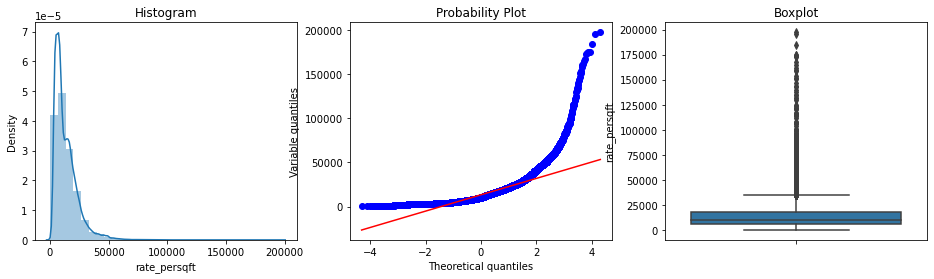

******* area_insqft *******


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


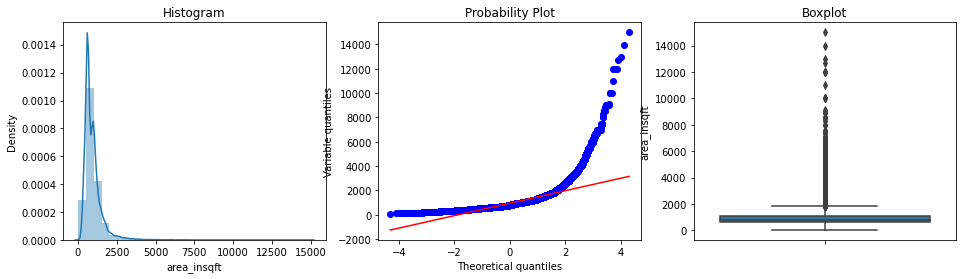

******* Bathroom *******


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


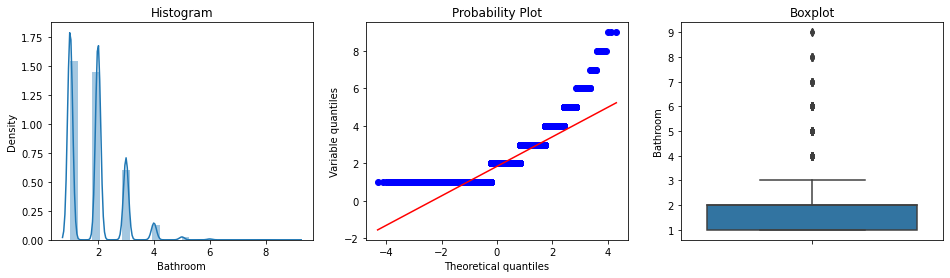

In [35]:
num_var = ["BHK","price(L)","rate_persqft","area_insqft","Bathroom"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df, var)

# here we observe outlier using histogram,, qq plot and boxplot 
#here we can see there are outliers in some features that we will remove to balance our dataset so other variable didnt get affected.

In [36]:
df3 = df[['price(L)', 'rate_persqft', 'area_insqft']].copy()
df3

#here we make a new data frame to remove the outliers of the features needed and then concatenate with previous dataframe

,price(L),rate_persqft,area_insqft
0,18.49,7034,263
1,40.00,11869,337
2,149.00,22513,664
3,49.00,7802,628
4,96.00,14222,675
...,...,...,...
84035,45.00,15000,300
84036,80.00,14545,550
84037,170.00,25185,675
84038,17.00,1789,950


In [38]:
df = df.drop(['price(L)','rate_persqft','area_insqft'],axis = 1)
df.head()

#droping the values so we can concat the new clean features

,BHK,location,construction_status,Sale_type,Bathroom
0,1,Panvel,Under Construction,new,1
1,1,Dombivali,Under Construction,new,1
2,2,Koper Khairane,Under Construction,new,2
3,2,Dombivali,Under Construction,new,2
4,1,Jogeshwari West,Under Construction,new,1


In [39]:
z_scores = stats.zscore(df3)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df3 = df3[filtered_entries]

#using Z-sore to remove the outliers from the features selected

In [40]:
df3

#this is our new dataframe with removed outliers affecting our data

,price(L),rate_persqft,area_insqft
0,18.49,7034,263
1,40.00,11869,337
2,149.00,22513,664
3,49.00,7802,628
4,96.00,14222,675
...,...,...,...
84035,45.00,15000,300
84036,80.00,14545,550
84037,170.00,25185,675
84038,17.00,1789,950


<AxesSubplot:xlabel='price(L)'>

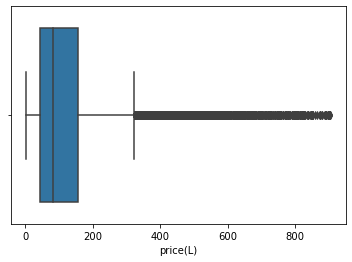

In [41]:
sns.boxplot(x=df3['price(L)'])

#we can compare the above box plots and see the difference outliers has been removed the ones remaining are relevant to our data

<AxesSubplot:xlabel='rate_persqft'>

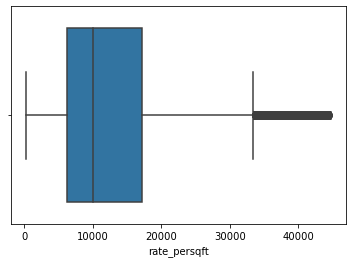

In [42]:
sns.boxplot(x=df3['rate_persqft'])

<AxesSubplot:xlabel='area_insqft'>

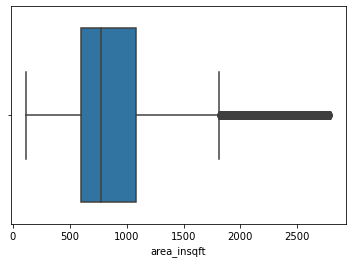

In [43]:
sns.boxplot(x=df3['area_insqft'])

In [44]:
df = pd.concat([df, df3], axis=1)
df.head()

#concatenate to our previous dataframe

,BHK,location,construction_status,Sale_type,Bathroom,price(L),rate_persqft,area_insqft
0,1,Panvel,Under Construction,new,1,18.49,7034.0,263.0
1,1,Dombivali,Under Construction,new,1,40.00,11869.0,337.0
2,2,Koper Khairane,Under Construction,new,2,149.00,22513.0,664.0
3,2,Dombivali,Under Construction,new,2,49.00,7802.0,628.0
4,1,Jogeshwari West,Under Construction,new,1,96.00,14222.0,675.0


In [45]:
df.isnull().sum()

#after we removed the outliers we get some na values 

BHK                       0
location                  0
construction_status       0
Sale_type                 0
Bathroom                  0
price(L)               2828
rate_persqft           2828
area_insqft            2828
dtype: int64

In [46]:
df = df.dropna()
df

#we can drop those values and reset the index so we get all aligned dataset

,BHK,location,construction_status,Sale_type,Bathroom,price(L),rate_persqft,area_insqft
0,1,Panvel,Under Construction,new,1,18.49,7034.0,263.0
1,1,Dombivali,Under Construction,new,1,40.00,11869.0,337.0
2,2,Koper Khairane,Under Construction,new,2,149.00,22513.0,664.0
3,2,Dombivali,Under Construction,new,2,49.00,7802.0,628.0
4,1,Jogeshwari West,Under Construction,new,1,96.00,14222.0,675.0
...,...,...,...,...,...,...,...,...
84035,1,Ghatkopar East,Ready to move,resale,1,45.00,15000.0,300.0
84036,1,Ghatkopar,Ready to move,resale,1,80.00,14545.0,550.0
84037,2,Ghatkopar,Ready to move,resale,2,170.00,25185.0,675.0
84038,2,Ghatkopar,Ready to move,resale,2,17.00,1789.0,950.0


In [47]:
df=df.reset_index()

#resetting the index

In [48]:
df=df.drop(labels='index',axis=1)
df.head()

#drop the extra index created that we dont need

,BHK,location,construction_status,Sale_type,Bathroom,price(L),rate_persqft,area_insqft
0,1,Panvel,Under Construction,new,1,18.49,7034.0,263.0
1,1,Dombivali,Under Construction,new,1,40.00,11869.0,337.0
2,2,Koper Khairane,Under Construction,new,2,149.00,22513.0,664.0
3,2,Dombivali,Under Construction,new,2,49.00,7802.0,628.0
4,1,Jogeshwari West,Under Construction,new,1,96.00,14222.0,675.0


# Categorical variable encoding

# Encoding Construction_status

In [49]:
for cat_var in ["Under Construction","Ready to move"]:
    df["construction_status"+cat_var] = np.where(df['construction_status']==cat_var, 1,0)
df.shape

(81212, 10)

# Encoding Sale_type

In [50]:
for cat_var in ["new","resale"]:
    df["Sale_type"+cat_var] = np.where(df['Sale_type']==cat_var, 1,0)
df.shape

(81212, 12)

# Encoding Location

In [51]:
# here we are selecting only the location which have count above 50

location_value_count = df['location'].value_counts()
location_value_count

Thane West             6642
Mira Road East         5832
Kharghar               2819
Kandivali East         2442
Ulwe                   2390
                       ... 
Yashaswi Nagar            1
Rawalapada                1
ahimsa marg               1
Vaishali Nagar Road       1
Penkarpada Road           1
Name: location, Length: 1216, dtype: int64

In [52]:
location_get_50 = location_value_count[location_value_count>=50].index
location_get_50

Index(['Thane West', 'Mira Road East', 'Kharghar', 'Kandivali East', 'Ulwe',
       'Dombivali', 'Virar', 'Chembur', 'Kalyan West', 'Panvel',
       ...
       'Mazgaon', 'Sector-18 Ulwe', 'Ulhasnagar', 'vasant vihar thane west',
       'New Balaji Nagar', 'Bhayandar West', 'Roadpali', 'Bhandup East',
       'Mahim', 'Agripada'],
      dtype='object', length=146)

In [53]:
for cat_var in location_get_50:
    df['location_'+cat_var]=np.where(df['location']==cat_var, 1,0)
df.shape

(81212, 158)

In [54]:
df.head()

,BHK,location,construction_status,Sale_type,Bathroom,price(L),rate_persqft,area_insqft,construction_statusUnder Construction,construction_statusReady to move,...,location_Mazgaon,location_Sector-18 Ulwe,location_Ulhasnagar,location_vasant vihar thane west,location_New Balaji Nagar,location_Bhayandar West,location_Roadpali,location_Bhandup East,location_Mahim,location_Agripada
0,1,Panvel,Under Construction,new,1,18.49,7034.0,263.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Dombivali,Under Construction,new,1,40.00,11869.0,337.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Koper Khairane,Under Construction,new,2,149.00,22513.0,664.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,Dombivali,Under Construction,new,2,49.00,7802.0,628.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Jogeshwari West,Under Construction,new,1,96.00,14222.0,675.0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Drop categorical variable

In [55]:
df = df.drop(["location","construction_status",'Sale_type'], axis =1)
df.shape

(81212, 155)

In [56]:
df.head()

,BHK,Bathroom,price(L),rate_persqft,area_insqft,construction_statusUnder Construction,construction_statusReady to move,Sale_typenew,Sale_typeresale,location_Thane West,...,location_Mazgaon,location_Sector-18 Ulwe,location_Ulhasnagar,location_vasant vihar thane west,location_New Balaji Nagar,location_Bhayandar West,location_Roadpali,location_Bhandup East,location_Mahim,location_Agripada
0,1,1,18.49,7034.0,263.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,40.00,11869.0,337.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,149.00,22513.0,664.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,49.00,7802.0,628.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,96.00,14222.0,675.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.to_csv('final_house_scrape.csv', index=False) 